In [8]:
!pip install opencv-python

In [9]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from google.colab.patches import cv2_imshow

In [10]:
pathc="/content/"
# Example images of red t-shirts
image_paths = [
    "red_tshirt_1.jpg",
    "red_tshirt_2.jpg",
    "red_tshirt_3.jpg",
    # Add more image paths here
]

In [11]:
# Load and extract features from images using OpenCV
def extract_features(image_path):
    image = cv2.imread(pathc+image_path)
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(image, (100, 100))  # Resize for consistent features
    print(image_path)
    cv2_imshow(resized_image)
    return resized_image.flatten()  # Flatten the image into a 1D vector

red_tshirt_1.jpg


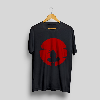

red_tshirt_2.jpg


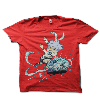

red_tshirt_3.jpg


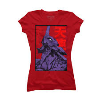

In [12]:
# Extract features for all images
image_features = [extract_features(path) for path in image_paths]

In [13]:
# Convert the features into a numpy array
image_features_array = np.array(image_features)

In [14]:
# Calculate cosine similarity between images
similarities = cosine_similarity(image_features_array)

In [15]:
# Recommend similar products based on a given image
def recommend_similar_products(query_image_features, num_recommendations=3):
    query_image_features = query_image_features.flatten().reshape(1, -1)
    query_similarity = cosine_similarity(query_image_features, image_features_array)
    similar_indices = np.argsort(-query_similarity)[0][:num_recommendations]

    return [image_paths[idx] for idx in similar_indices]

query_red_tshirt.jpg


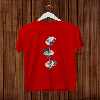

In [16]:
# Example query image (you can replace this with your own query image)
query_image_path = "query_red_tshirt.jpg"
query_image_features = extract_features(query_image_path)

In [17]:
# Recommend similar products based on the query image
recommended_products = recommend_similar_products(query_image_features)

In [18]:
print("Recommended similar products:")
for product in recommended_products:
    print(product)

Recommended similar products:
red_tshirt_2.jpg
red_tshirt_3.jpg
red_tshirt_1.jpg


UserRecommendationbyimages takes a image input ,extract features then find cosine similarity between existing products in database then recommend users similar products.This is item-based collaborative filtering technique.

Import Libraries: The code starts by importing necessary libraries. OpenCV is used to work with images, and scikit-learn's cosine_similarity is used to calculate the similarity between image features.

Image Paths: The code lists the file paths of example red t-shirt images. You can add more image paths here.

Load and Extract Features: The extract_features function loads an image, converts it to grayscale (black and white), and resizes it to a consistent size. This processed image is then flattened into a 1D array of pixel values. This array represents the features of the image.

Feature Extraction for All Images: The code goes through each image path and extracts its features using the extract_features function. These extracted features are stored in the image_features list.

Calculate Similarities: The extracted features are converted into a numpy array. Using this array, the code calculates the similarity between the images using cosine similarity. This creates a similarity matrix where each entry indicates how similar two images are based on their features.

Recommendation Function: The recommend_similar_products function takes the features of a query image and the number of recommendations desired. It calculates the cosine similarity between the query image's features and all the other images' features. The indices of the most similar images are sorted in descending order, and the top similar indices are selected.

Example Query Image: The code specifies a query image path (a red t-shirt image for which you want recommendations). The features of this query image are extracted using the extract_features function.

Recommend Similar Products: The recommend_similar_products function is called with the query image features. It returns a list of recommended product image paths based on similarity to the query image.

Print Recommendations: The code prints out the recommended product image paths for the user to see.

In simple terms, this code takes example images of red t-shirts, processes them to understand their visual characteristics, and then uses these characteristics to suggest other similar t-shirt products when given a new image as input. It does this by comparing the features of images using a mathematical concept called cosine similarity, which helps identify images with similar visual attributes.




